In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as s
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [18]:
data = pd.read_excel('fitur_all_100data.xlsx')

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   HR        100 non-null    float64
 1   SDNN      100 non-null    float64
 2   RMSSD     100 non-null    float64
 3   SDSD      100 non-null    float64
 4   pNN50     100 non-null    float64
 5   LF        100 non-null    float64
 6   HF        100 non-null    float64
 7   LF/HF     100 non-null    float64
 8   SD1       100 non-null    float64
 9   SD2       100 non-null    float64
 10  SD_ratio  100 non-null    float64
 11  Label     100 non-null    int64  
dtypes: float64(11), int64(1)
memory usage: 9.5 KB


In [20]:
data_copy = data.replace(to_replace=['0','1'],value=[0,1],inplace=False)


In [21]:
corr_df = data.corr()
corr_df = abs(corr_df)
corr_df

,HR,SDNN,RMSSD,SDSD,pNN50,LF,HF,LF/HF,SD1,SD2,SD_ratio,Label
HR,1.000000,0.294124,0.160542,0.226310,0.538200,0.227438,0.121324,0.527704,0.160539,0.295729,0.438251,0.626092
SDNN,0.294124,1.000000,0.734505,0.727300,0.086234,0.040099,0.438550,0.043392,0.734481,0.971718,0.140037,0.000891
RMSSD,0.160542,0.734505,1.000000,0.994445,0.035409,0.009356,0.306425,0.144960,1.000000,0.555686,0.412713,0.203389
SDSD,0.226310,0.727300,0.994445,1.000000,0.135059,0.028355,0.279557,0.088091,0.994445,0.546763,0.373139,0.141344
pNN50,0.538200,0.086234,0.035409,0.135059,1.000000,0.222837,0.217377,0.503762,0.035409,0.141054,0.311856,0.555689
LF,0.227438,0.040099,0.009356,0.028355,0.222837,1.000000,0.110651,0.156214,0.009369,0.037453,0.185098,0.398871
HF,0.121324,0.438550,0.306425,0.279557,0.217377,0.110651,1.000000,0.099324,0.306414,0.435536,0.147953,0.075656
LF/HF,0.527704,0.043392,0.144960,0.088091,0.503762,0.156214,0.099324,1.000000,0.144971,0.085101,0.660681,0.442967
SD1,0.160539,0.734481,1.000000,0.994445,0.035409,0.009369,0.306414,0.144971,1.000000,0.555657,0.412751,0.203386
SD2,0.295729,0.971718,0.555686,0.546763,0.141054,0.037453,0.435536,0.085101,0.555657,1.000000,0.294018,0.054090


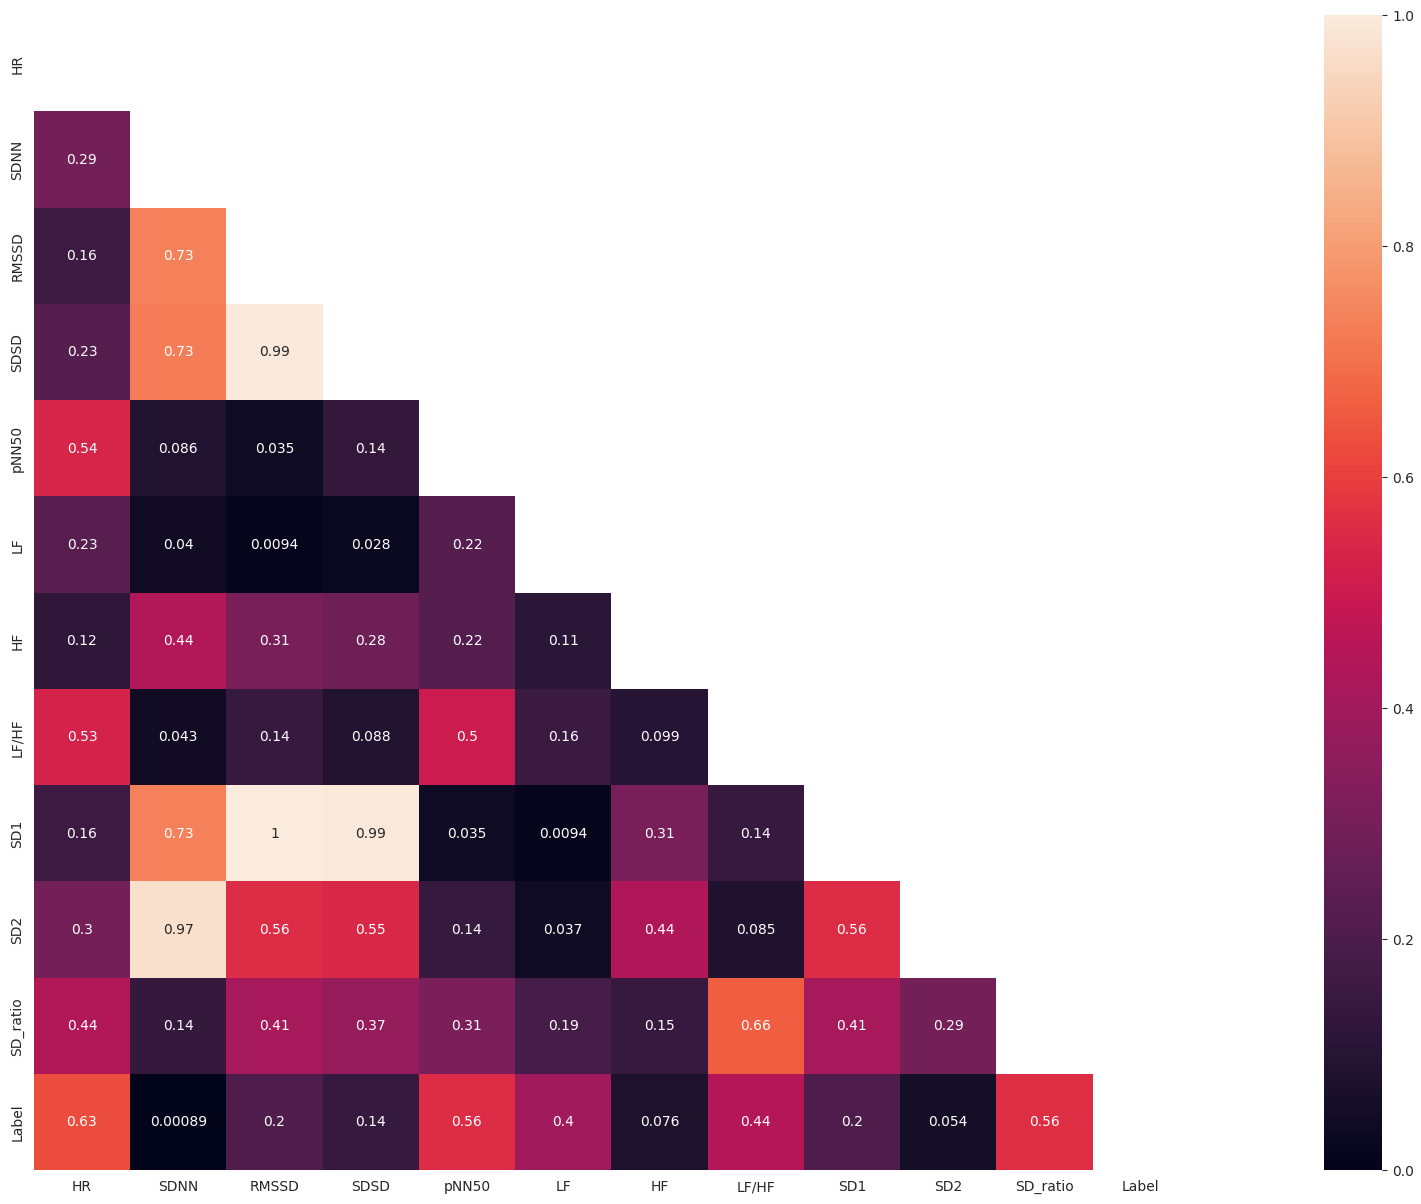

In [22]:
mask = np.zeros_like(data_copy.corr())
mask[np.triu_indices_from(mask)] = True 
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(35,15))
    sns.heatmap(data=corr_df,vmin=0,vmax=1,mask=mask,square=True,annot=True)

In [25]:
strong_relation_features = pd.Series(corr_df['Label']).nlargest(n=13).iloc[1:] #iloc menghapus label 
strong_relation_features

HR          0.626092
SD_ratio    0.560533
pNN50       0.555689
LF/HF       0.442967
LF          0.398871
RMSSD       0.203389
SD1         0.203386
SDSD        0.141344
HF          0.075656
SD2         0.054090
SDNN        0.000891
Name: Label, dtype: float64

In [24]:
data_copy = pd.concat([data[list(strong_relation_features.index)], data["Label"]], axis=1)
data_copy

,HR,SD_ratio,pNN50,LF/HF,LF,RMSSD,SD1,SDSD,HF,SD2,SDNN,Label
0,61.126662,4.770022,12.292359,5.539092,0.040039,34.770725,24.586604,19.973247,0.217773,117.278655,84.736737,1
1,60.123075,4.326800,19.594595,3.672042,0.040039,40.079229,28.340295,23.955765,0.220703,122.622780,89.127107,1
2,66.351543,4.821993,11.384615,5.837829,0.040039,38.554377,27.259811,29.226415,0.198242,131.446613,95.062589,1
3,60.307120,3.566797,14.429530,4.973868,0.041992,33.649047,23.793290,21.731285,0.178711,84.865824,62.335594,1
4,61.598715,3.402178,14.144737,1.215300,0.041016,34.774792,24.589443,22.433829,0.259766,83.657657,61.699760,1
...,...,...,...,...,...,...,...,...,...,...,...,...
95,54.046335,2.130633,27.443609,0.996364,0.045898,47.518101,33.599520,27.424226,0.214844,71.588232,56.003246,0
96,54.546665,2.356639,21.561338,0.901151,0.054688,41.399046,29.273122,23.727736,0.210938,68.986192,53.027952,0
97,54.446286,1.805659,17.843866,0.627705,0.050781,38.872301,27.486553,21.738680,0.215820,49.631346,40.269418,0
98,54.786203,1.641201,15.867159,0.890904,0.059570,37.409522,26.452526,22.114671,0.229492,43.413921,35.956827,0
